# Credit Risk Modelling in Python

Credit risk is the possibility that a borrower will not be able to make timely payments and will default on their debt. It refers to the possibility that a lender may not get the interest or principle due to them on time.

Financial organisations are concerned about reducing the risk of default. As a result, commercial and investment banks, venture capital funds, asset management organisations, and insurance corporations, to mention a few, are increasingly depending on technology to anticipate which customers are most likely to default on their obligations.

#### Machine Learning models have helped these companies in improving the accuracy of their credit risk analysis by giving a scientific technique for predicting potential debtors.

##### The objective of this article is to build a model to predict probability of person defaulting a loan. The following steps will be followed in building the model.

- Data Preprocessing and data prepration
- Features Engineering and Features selection
- Model Developement and Model Evaluations

Data links:
https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset


## Importing the libraries and reading the data

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Reading the data from an Excel file and skipping the first row
df = pd.read_excel("default of credit card clients (1).xls", skiprows=1)

# Displaying the first few rows of the data
df.head()



,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# Drop the 'ID' column
df = df.drop('ID', axis=1)

## Data preparation and Pre-processing

The data set was taken from kaggle for credit risk modelling. The data initially revealed a total of 25 features. It is very important to clean the data in a suitable format before developing any machine learning model.

In [ ]:
# Lets see the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

We are working with a data set containing 24 features for 30,000 clients. "default.payment.next.month" is a feature and is the target variable we are trying to predict.

In [ ]:
# Lets check the statistics of data
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
# checking for missing values
df.isnull().sum()

,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0
PAY_5,0


 We do not find any missing values in our data set.

### Analysis of column "EDUCATION"

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

In [ ]:
# Display the counts for each class in the "EDUCATION" column
print(df['EDUCATION'].value_counts())


EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64


In [ ]:
# Combine classes 0, 4, 5, and 6 into Class 4
df['EDUCATION'] = df['EDUCATION'].replace({0: 4, 4: 4, 5: 4, 6: 4})

# Display the updated counts
print(df['EDUCATION'].value_counts())


EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64


### Aalysis of column "MARRIAGE"

Marital status (1=married, 2=single, 3=others)

In [ ]:
# lets see the values count in column marriage
df['MARRIAGE'].value_counts()

,count
MARRIAGE,
2,15964
1,13659
3,323
0,54


In [ ]:
# Here I am going to map 0 with 3
df['MARRIAGE'].replace({0:3,1:1,2:2,3:3}, inplace=True)
df['MARRIAGE'].value_counts()

<ipython-input-11-b9a24c9ec722>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MARRIAGE'].replace({0:3,1:1,2:2,3:3}, inplace=True)


,count
MARRIAGE,
2,15964
1,13659
3,377


**Data Visualization**

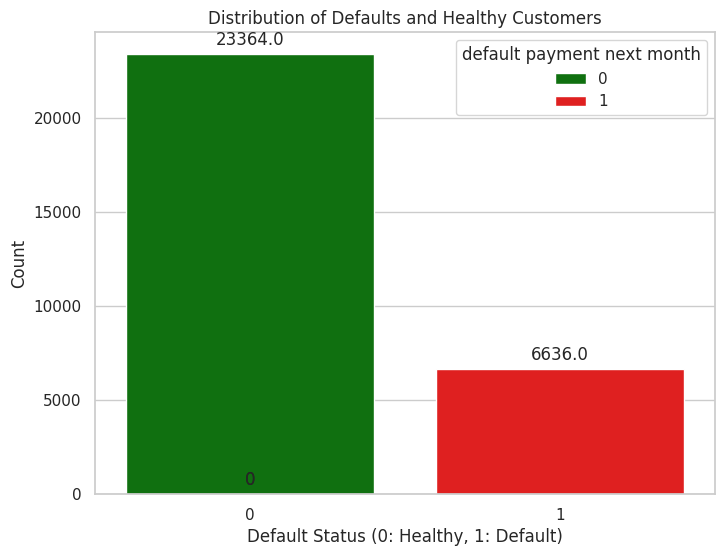

In [ ]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='default payment next month', data=df, palette={0: "green", 1: "red"}, hue='default payment next month', dodge=False)

# Annotate the plot
plt.title('Distribution of Defaults and Healthy Customers')
plt.xlabel('Default Status (0: Healthy, 1: Default)')
plt.ylabel('Count')

# Display count on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


### Analysis of column "PAY_0 to PAY_6"

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

In [ ]:
# Lets see the value counts in column 'PAY_0'
df['PAY_0'].value_counts()

,count
PAY_0,
0,14737
-1,5686
1,3688
-2,2759
2,2667
3,322
4,76
5,26
8,19


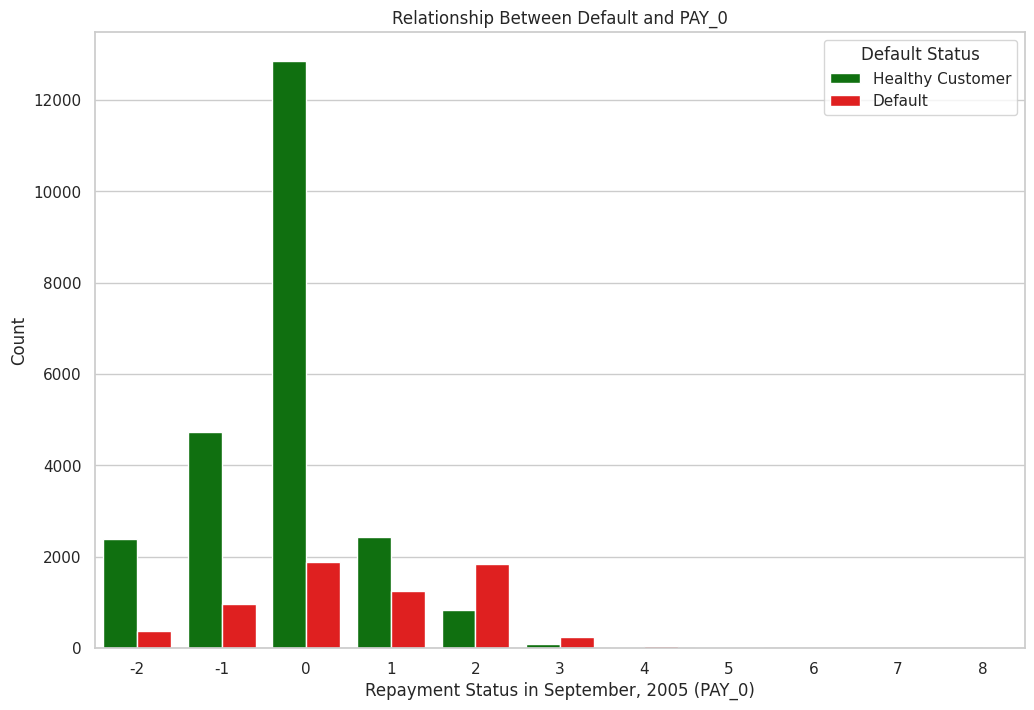

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Create a grouped bar plot
plt.figure(figsize=(12, 8))
sns.countplot(x='PAY_0', hue='default payment next month', data=df, palette={0: "green", 1: "red"})

# Annotate the plot
plt.title('Relationship Between Default and PAY_0')
plt.xlabel('Repayment Status in September, 2005 (PAY_0)')
plt.ylabel('Count')
plt.legend(title='Default Status', labels=['Healthy Customer', 'Default'])
plt.show()


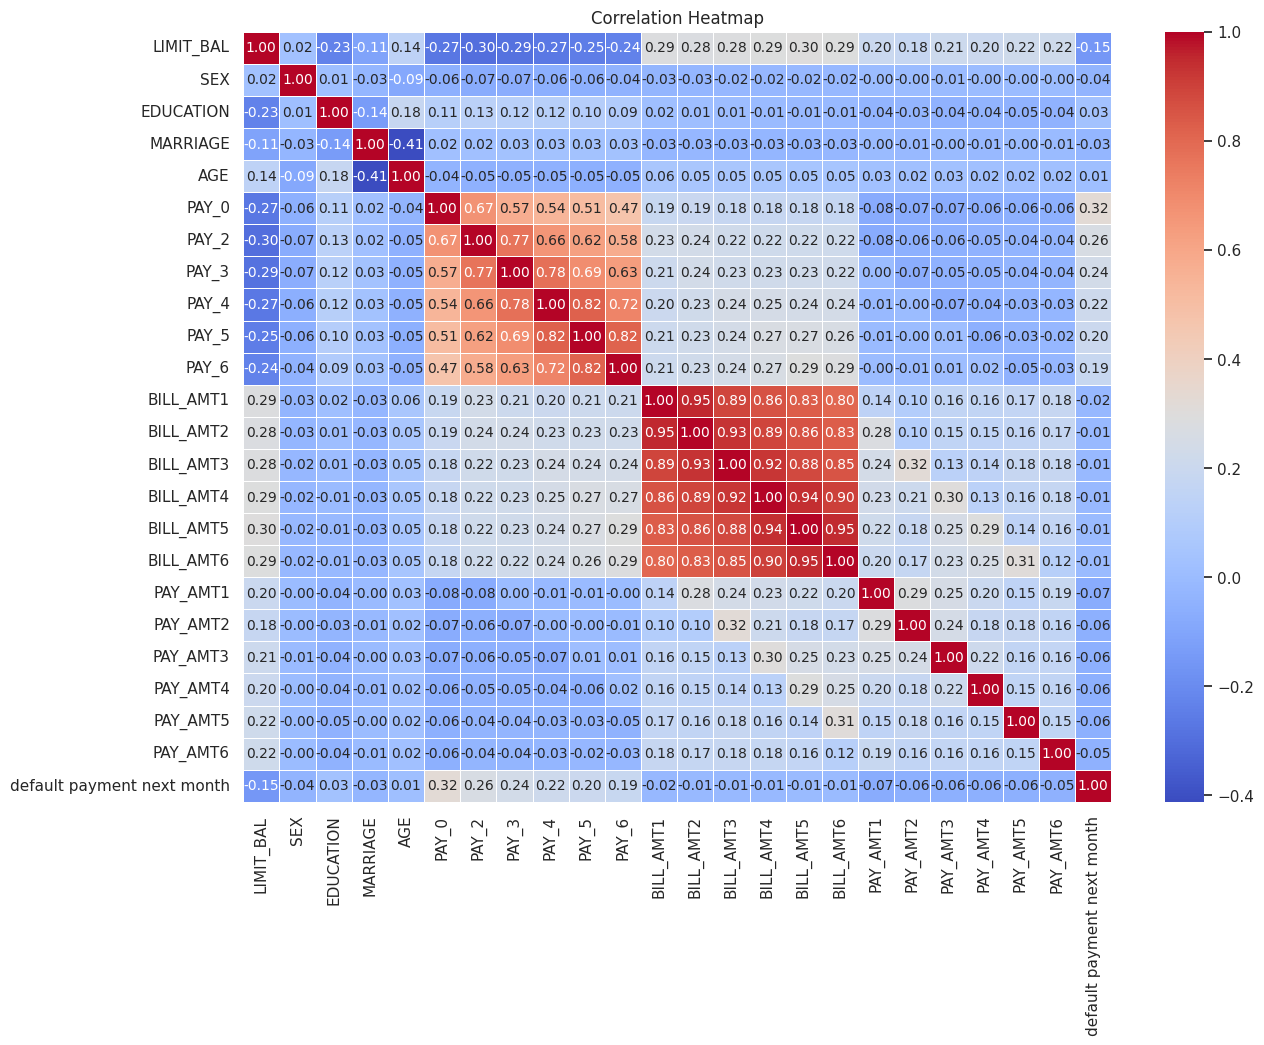

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Set the style for the plot
plt.figure(figsize=(14, 10))  # Increase the size of the heatmap

sns.set(style="whitegrid")

# Create a heatmap with larger font size for annotations
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=.5, fmt=".2f", annot_kws={"size": 10})

# Set the title of the heatmap
plt.title("Correlation Heatmap")

# Display the plot
plt.show()



**MODEL BUILDING TRANSFORMER BASED**

In [ ]:
pip install keras-transformer

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for keras-transformer: filename=keras_transformer-0.40.0-py3-none-any.whl size=12285 sha256=7fb5ab2cd24d89040a35fb081c81495be49bcba9fa5b8201c7bc6024f484f6b2
  Stored in directory: /root/.cache/pip/wheels/20/f6/8d/9063ab182cbf213b859ee9dfd602df75928007bbb916e8a2c7
  Created wheel for keras-embed-sim: filename=keras_embed_sim-0.10.0-py3-none-any.whl size=3944 sha256=116e571ffd7831770838e822a62f80744ebac223fbf183000d42cef9148f8692
  Stored in directory: /root/.cache/pip/wheels/58/0e/e7/55564ff6deabde27c81e86b26e2999ae83669683bc88fa83de
  Created wheel for keras-layer-normalization: filename=keras_layer_normalization-0.16.0-py3-none-any.whl size=4654 sha256=62508637e324cd0a4aad7f5f51e56ee5968

**TRANSFORMER BASED MODEL- CREDIT RISK MODELLING**

**GRU TRANSFORMER: TEMPORAL**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, roc_curve
from imblearn.metrics import geometric_mean_score
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1_l2

# Assuming 'df' is your DataFrame

# Define temporal features
temporal_features = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                     'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                     'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
target = 'default payment next month'

# Preprocess the data
X_temporal = df[temporal_features]
y = df[target]

# Train-test split
X_train_temporal, X_test_temporal, y_train, y_test = train_test_split(
    X_temporal, y, test_size=0.2, random_state=42
)

# Scale the features for both training and testing data
scaler = StandardScaler()
X_train_temporal_scaled = scaler.fit_transform(X_train_temporal)
X_test_temporal_scaled = scaler.transform(X_test_temporal)

# Reshape temporal data to 3D for both training and testing sets
X_train_temporal_scaled_3d = X_train_temporal_scaled.reshape(X_train_temporal_scaled.shape[0], 1, X_train_temporal_scaled.shape[1])
X_test_temporal_scaled_3d = X_test_temporal_scaled.reshape(X_test_temporal_scaled.shape[0], 1, X_test_temporal_scaled.shape[1])

# Model Architecture with SMABiGRU including Dropout and L1/L2 Regularization
def create_smabigru_model():
    input_temporal = layers.Input(shape=(X_train_temporal_scaled_3d.shape[1], X_train_temporal_scaled_3d.shape[2]))
    # Bidirectional GRU layer with Dropout
    x_temporal = layers.Bidirectional(layers.GRU(64, return_sequences=True, dropout=0.1))(input_temporal)

    # Self Multi-head Attention with Dropout
    for _ in range(3):  # Reduced to 3 for complexity management
        attention_output = MultiHeadAttention(num_heads=4, key_dim=32)(x_temporal, x_temporal)
        attention_output = layers.Dropout(0.4)(attention_output)
        x_temporal = layers.Add()([attention_output, x_temporal])
        x_temporal = LayerNormalization(epsilon=1e-6)(x_temporal)

    # Flatten and apply Dense layer with L1/L2 regularization
    x_temporal_flatten = layers.Flatten()(x_temporal)
    output = layers.Dense(1, activation="sigmoid", kernel_regularizer=l1_l2(l1=0.01, l2=0.01))(x_temporal_flatten)

    model = keras.Model(inputs=input_temporal, outputs=output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = create_smabigru_model()

early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
history = model.fit(
    X_train_temporal_scaled_3d, y_train,
    epochs=30,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stopping]
)

y_pred = model.predict(X_test_temporal_scaled_3d)
y_pred_classes = (y_pred > 0.5).astype("int32")

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
ks_statistic = max(tpr - fpr)

accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
roc_auc = roc_auc_score(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
geometric_mean = geometric_mean_score(y_test, y_pred_classes)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC: {roc_auc}")
print(f"AUC PR: {average_precision}")
print(f"Geometric Mean: {geometric_mean}")
print(f"KS Statistic: {ks_statistic}")


Epoch 1/30
150/150 [==============================] - 16s 17ms/step - loss: 0.5891 - accuracy: 0.7981 - val_loss: 0.5424 - val_accuracy: 0.8142
Epoch 2/30
150/150 [==============================] - 2s 11ms/step - loss: 0.5105 - accuracy: 0.8118 - val_loss: 0.4947 - val_accuracy: 0.8125
Epoch 3/30
150/150 [==============================] - 2s 13ms/step - loss: 0.4722 - accuracy: 0.8136 - val_loss: 0.4643 - val_accuracy: 0.8121
Epoch 4/30
150/150 [==============================] - 2s 15ms/step - loss: 0.4569 - accuracy: 0.8152 - val_loss: 0.4571 - val_accuracy: 0.8156
Epoch 5/30
150/150 [==============================] - 2s 11ms/step - loss: 0.4521 - accuracy: 0.8158 - val_loss: 0.4565 - val_accuracy: 0.8163
Epoch 6/30
150/150 [==============================] - 2s 11ms/step - loss: 0.4490 - accuracy: 0.8138 - val_loss: 0.4572 - val_accuracy: 0.8112
Epoch 7/30
150/150 [==============================] - 2s 11ms/step - loss: 0.4481 - accuracy: 0.8167 - val_loss: 0.4561 - val_accuracy: 0.816

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


**GRU LAYERS : COMBINE TEMPORAL AND NON-TEMPORAL**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, roc_curve
from imblearn.metrics import geometric_mean_score
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1_l2

# Assuming 'df' is your DataFrame
# Define temporal and non-temporal features
temporal_features = [
    'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
]
non_temporal_features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']
target = 'default payment next month'

# Preprocess the data
X_temporal = df[temporal_features]
X_non_temporal = df[non_temporal_features]
y = df[target]

# Normalize features using separate scalers
scaler_temporal = StandardScaler()
scaler_non_temporal = StandardScaler()

X_temporal_scaled = scaler_temporal.fit_transform(X_temporal)
X_non_temporal_scaled = scaler_non_temporal.fit_transform(X_non_temporal)

# Combine temporal and non-temporal features
X_combined = np.hstack((X_temporal_scaled, X_non_temporal_scaled))

# Reshape only the temporal data to 3D, keep non-temporal data as is
X_temporal_3d = X_combined[:, :len(temporal_features)].reshape(X_combined.shape[0], 1, -1)
X_non_temporal_flat = X_combined[:, len(temporal_features):]  # No reshape needed

# Combine 3D temporal with flat non-temporal for input to model
X_combined_3d = np.concatenate([X_temporal_3d, X_non_temporal_flat[:, None, :]], axis=2)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined_3d, y, test_size=0.2, random_state=42)

# Define the Transformer model architecture with SMABiGRU
def create_smabigru_model():
    num_features = X_train.shape[2]  # Total number of features
    input_layer = layers.Input(shape=(1, num_features))
    x = layers.Bidirectional(layers.GRU(64, return_sequences=True, dropout=0.1))(input_layer)
    for _ in range(3):
        attention_output = layers.MultiHeadAttention(num_heads=4, key_dim=32)(x, x)
        attention_output = layers.Dropout(0.4)(attention_output)
        x = layers.Add()([attention_output, x])
        x = layers.LayerNormalization()(x)
    x_flatten = layers.Flatten()(x)
    output = layers.Dense(1, activation="sigmoid", kernel_regularizer=l1_l2(l2=0.01))(x_flatten)
    model = keras.Model(inputs=input_layer, outputs=output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = create_smabigru_model()
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

# Predictions
y_pred_smabigru = model.predict(X_test).flatten()
y_pred_classes_smabigru = (y_pred_smabigru > 0.5).astype("int32")

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
ks_statistic = max(tpr - fpr)
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
roc_auc = roc_auc_score(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
geometric_mean = geometric_mean_score(y_test, y_pred_classes)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC: {roc_auc}")
print(f"AUC PR: {average_precision}")
print(f"Geometric Mean: {geometric_mean}")
print(f"KS Statistic: {ks_statistic}")


Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7737 - loss: 0.5377 - val_accuracy: 0.8069 - val_loss: 0.4767
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8140 - loss: 0.4610 - val_accuracy: 0.8119 - val_loss: 0.4743
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.8098 - loss: 0.4655 - val_accuracy: 0.8125 - val_loss: 0.4543
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8155 - loss: 0.4491 - val_accuracy: 0.8144 - val_loss: 0.4493
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8169 - loss: 0.4422 - val_accuracy: 0.8148 - val_loss: 0.4515
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8142 - loss: 0.4458 - val_accuracy: 0.8158 - val_loss: 0.4523
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8147 - loss: 0.4438 - val_accuracy: 0.8158 - val_loss: 0.4452
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8148 - loss: 0.4393 -

**GRU Model only**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, roc_curve
from imblearn.metrics import geometric_mean_score
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1_l2

# === Load and Prepare Data ===
# Assuming 'df' is your DataFrame
# Define temporal and non-temporal features
temporal_features = [
    'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
]
non_temporal_features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']
target = 'default payment next month'

# Preprocess the data
X_temporal = df[temporal_features]
X_non_temporal = df[non_temporal_features]
y = df[target]

# Normalize features using separate scalers
scaler_temporal = StandardScaler()
scaler_non_temporal = StandardScaler()

X_temporal_scaled = scaler_temporal.fit_transform(X_temporal)
X_non_temporal_scaled = scaler_non_temporal.fit_transform(X_non_temporal)

# Combine temporal and non-temporal features
X_combined = np.hstack((X_temporal_scaled, X_non_temporal_scaled))

# Reshape only the temporal data to 3D, keep non-temporal data as is
X_temporal_3d = X_combined[:, :len(temporal_features)].reshape(X_combined.shape[0], 1, -1)
X_non_temporal_flat = X_combined[:, len(temporal_features):]  # No reshape needed

# Combine 3D temporal with flat non-temporal for input to model
X_combined_3d = np.concatenate([X_temporal_3d, X_non_temporal_flat[:, None, :]], axis=2)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined_3d, y, test_size=0.2, random_state=42)

# === Define GRU-Only Model ===
def create_gru_only_model():
    num_features = X_train.shape[2]  # Total number of features
    input_layer = layers.Input(shape=(1, num_features))

    # Only GRU, without Multi-Head Attention
    x = layers.Bidirectional(layers.GRU(64, return_sequences=True, dropout=0.1))(input_layer)
    x_flatten = layers.Flatten()(x)
    output = layers.Dense(1, activation="sigmoid", kernel_regularizer=l1_l2(l2=0.01))(x_flatten)

    model = keras.Model(inputs=input_layer, outputs=output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Train GRU-Only Model
model_gru = create_gru_only_model()
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
history_gru = model_gru.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

# Predictions
y_pred_gru = model_gru.predict(X_test).flatten()
y_pred_classes_gru = (y_pred_gru > 0.5).astype("int32")

# === Compute Metrics ===
fpr_gru, tpr_gru, _ = roc_curve(y_test, y_pred_gru)
ks_statistic_gru = max(tpr_gru - fpr_gru)
accuracy_gru = accuracy_score(y_test, y_pred_classes_gru)
precision_gru = precision_score(y_test, y_pred_classes_gru)
recall_gru = recall_score(y_test, y_pred_classes_gru)
f1_gru = f1_score(y_test, y_pred_classes_gru)
roc_auc_gru = roc_auc_score(y_test, y_pred_gru)
average_precision_gru = average_precision_score(y_test, y_pred_gru)
geometric_mean_gru = geometric_mean_score(y_test, y_pred_classes_gru)

# Print results
print("\n=== GRU-Only Model Performance ===")
print(f"Accuracy: {accuracy_gru:.4f}")
print(f"Precision: {precision_gru:.4f}")
print(f"Recall: {recall_gru:.4f}")
print(f"F1 Score: {f1_gru:.4f}")
print(f"AUC: {roc_auc_gru:.4f}")
print(f"AUC PR: {average_precision_gru:.4f}")
print(f"Geometric Mean: {geometric_mean_gru:.4f}")
print(f"KS Statistic: {ks_statistic_gru:.4f}")



Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7270 - loss: 0.5967 - val_accuracy: 0.8079 - val_loss: 0.4910
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8109 - loss: 0.4770 - val_accuracy: 0.8096 - val_loss: 0.4725
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8142 - loss: 0.4590 - val_accuracy: 0.8121 - val_loss: 0.4644
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8207 - loss: 0.4485 - val_accuracy: 0.8117 - val_loss: 0.4608
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8133 - loss: 0.4549 - val_accuracy: 0.8096 - val_loss: 0.4584
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8195 - loss: 0.4467 - val_accuracy: 0.8160 - val_loss: 0.4555
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8181 - loss: 0.4398 - val_accuracy: 0.8135 - val_loss: 0.4542
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8150 - loss: 0.4483 - val_acc

**CNN-SFTRANSFORMER: TEMPORAL + Non-Temporal.Macnemar**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1_l2
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, roc_curve
from imblearn.metrics import geometric_mean_score
import tensorflow as tf

# Assuming 'df' is your DataFrame containing the dataset

# Define temporal and non-temporal features
temporal_features = [
    'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
]
non_temporal_features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']
target = 'default payment next month'

# Preprocess the data
X_temporal = df[temporal_features]
X_non_temporal = df[non_temporal_features]
y = df[target]

# Normalize features using separate scalers
scaler_temporal = StandardScaler()
scaler_non_temporal = StandardScaler()

X_temporal_scaled = scaler_temporal.fit_transform(X_temporal)
X_non_temporal_scaled = scaler_non_temporal.fit_transform(X_non_temporal)

# Combine temporal and non-temporal features
X_combined = np.hstack((X_temporal_scaled, X_non_temporal_scaled))

# Reshape only the temporal data to 3D, keep non-temporal data as is
X_temporal_3d = X_combined[:, :len(temporal_features)].reshape(X_combined.shape[0], 1, -1)
X_non_temporal_flat = X_combined[:, len(temporal_features):]  # No reshape needed

# Combine 3D temporal with flat non-temporal for input to model
X_combined_3d = np.concatenate([X_temporal_3d, X_non_temporal_flat[:, None, :]], axis=2)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined_3d, y, test_size=0.2, random_state=42)

# Define and build the CNN-SFTransformer model
def create_cnn_sftransformer_model():
    input_shape = X_train.shape[1:]  # Shape of the input (1, number of features)
    inputs = layers.Input(shape=input_shape)

    # CNN branch for temporal data
    cnn = layers.Conv1D(filters=64, kernel_size=1, activation='relu')(inputs[:, :, :len(temporal_features)])
    cnn = layers.Conv1D(filters=128, kernel_size=1, activation='relu')(cnn)
    cnn = layers.GlobalMaxPooling1D()(cnn)

    # SFTransformer branch
    gw_layer = GaussianWeightTokenization(num_tokens=32)(inputs)
    attention_output = layers.MultiHeadAttention(num_heads=10, key_dim=32)(gw_layer[0], gw_layer[1], gw_layer[2])
    attention_output = layers.LayerNormalization(epsilon=1e-6)(attention_output)
    attention_output = layers.Flatten()(attention_output)

    # Concatenate CNN and Transformer branches
    concatenated = layers.Concatenate()([cnn, attention_output])
    output = layers.Dense(1, activation="sigmoid", kernel_regularizer=l1_l2(l2=0.01))(concatenated)

    model = keras.Model(inputs=inputs, outputs=output)
    return model

model = create_cnn_sftransformer_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

# Make predictions and label them for future McNemar's test
y_pred_sft_cnn = model.predict(X_test).flatten()  # Naming it distinctly for McNemar's test use
y_pred_classes_sft_cnn = (y_pred_sft_cnn > 0.5).astype(int)  # Binary classification

# Evaluation metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_sft_cnn)
ks_statistic = max(tpr - fpr)
accuracy = accuracy_score(y_test, y_pred_classes_sft_cnn)
precision = precision_score(y_test, y_pred_classes_sft_cnn)
recall = recall_score(y_test, y_pred_classes_sft_cnn)
f1 = f1_score(y_test, y_pred_classes_sft_cnn)
roc_auc = roc_auc_score(y_test, y_pred_sft_cnn)
average_precision = average_precision_score(y_test, y_pred_sft_cnn)
geometric_mean = geometric_mean_score(y_test, y_pred_classes_sft_cnn)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC: {roc_auc}")
print(f"AUC PR: {average_precision}")
print(f"Geometric Mean: {geometric_mean}")
print(f"KS Statistic: {ks_statistic}")


Epoch 1/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8042 - loss: 0.5020 - val_accuracy: 0.8152 - val_loss: 0.4653
Epoch 2/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8185 - loss: 0.4519 - val_accuracy: 0.8121 - val_loss: 0.4611
Epoch 3/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8185 - loss: 0.4470 - val_accuracy: 0.8075 - val_loss: 0.4597
Epoch 4/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8203 - loss: 0.4413 - val_accuracy: 0.8056 - val_loss: 0.4617
Epoch 5/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8178 - loss: 0.4443 - val_accuracy: 0.8144 - val_loss: 0.4501
Epoch 6/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8164 - loss: 0.4389 - val_accuracy: 0.8173 - val_loss: 0.4469
Epoch 7/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8236 - loss: 0.4331 - val_accuracy: 0.8215 - val_loss: 0.4437
Epoch 8/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8196 - loss: 0.4322 - val_accu

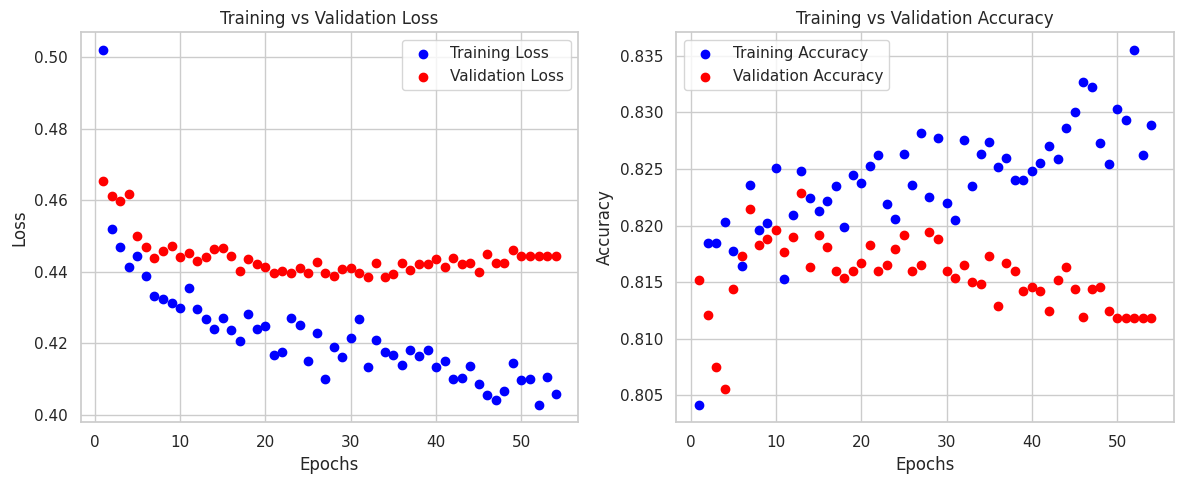

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given epoch range
epochs = np.array(range(1, 55))

# Training & Validation Loss
train_loss = np.array([0.5020, 0.4519, 0.4470, 0.4413, 0.4443, 0.4389, 0.4331, 0.4322, 0.4313, 0.4298,
                       0.4353, 0.4295, 0.4267, 0.4240, 0.4271, 0.4236, 0.4207, 0.4280, 0.4238, 0.4247,
                       0.4166, 0.4175, 0.4269, 0.4250, 0.4151, 0.4229, 0.4100, 0.4190, 0.4161, 0.4215,
                       0.4266, 0.4134, 0.4209, 0.4175, 0.4166, 0.4139, 0.4180, 0.4163, 0.4180, 0.4132,
                       0.4149, 0.4100, 0.4103, 0.4137, 0.4085, 0.4056, 0.4041, 0.4067, 0.4143, 0.4098,
                       0.4100, 0.4028, 0.4105, 0.4058])

val_loss = np.array([0.4653, 0.4611, 0.4597, 0.4617, 0.4501, 0.4469, 0.4437, 0.4458, 0.4472, 0.4441,
                     0.4453, 0.4430, 0.4442, 0.4462, 0.4466, 0.4444, 0.4403, 0.4434, 0.4420, 0.4412,
                     0.4396, 0.4402, 0.4395, 0.4411, 0.4397, 0.4426, 0.4395, 0.4389, 0.4407, 0.4411,
                     0.4397, 0.4386, 0.4424, 0.4384, 0.4392, 0.4424, 0.4405, 0.4420, 0.4421, 0.4436,
                     0.4414, 0.4438, 0.4422, 0.4423, 0.4398, 0.4449, 0.4425, 0.4423, 0.4461, 0.4478,
                     0.4453, 0.4479, 0.4447, 0.4424])

# Training & Validation Accuracy
train_acc = np.array([0.8042, 0.8185, 0.8185, 0.8203, 0.8178, 0.8164, 0.8236, 0.8196, 0.8202, 0.8251,
                      0.8153, 0.8209, 0.8248, 0.8224, 0.8213, 0.8222, 0.8235, 0.8199, 0.8245, 0.8238,
                      0.8253, 0.8262, 0.8219, 0.8206, 0.8263, 0.8236, 0.8282, 0.8225, 0.8277, 0.8220,
                      0.8205, 0.8276, 0.8235, 0.8263, 0.8274, 0.8252, 0.8260, 0.8240, 0.8240, 0.8248,
                      0.8255, 0.8270, 0.8259, 0.8286, 0.8300, 0.8327, 0.8322, 0.8273, 0.8254, 0.8303,
                      0.8293, 0.8355, 0.8262, 0.8289])

val_acc = np.array([0.8152, 0.8121, 0.8075, 0.8056, 0.8144, 0.8173, 0.8215, 0.8183, 0.8188, 0.8196,
                    0.8177, 0.8190, 0.8229, 0.8163, 0.8192, 0.8181, 0.8160, 0.8154, 0.8160, 0.8167,
                    0.8183, 0.8160, 0.8165, 0.8179, 0.8192, 0.8160, 0.8165, 0.8194, 0.8188, 0.8160,
                    0.8154, 0.8165, 0.8150, 0.8148, 0.8173, 0.8129, 0.8167, 0.8160, 0.8142, 0.8146,
                    0.8142, 0.8125, 0.8152, 0.8163, 0.8144, 0.8119, 0.8144, 0.8146, 0.8125, 0.8108,
                    0.8102, 0.8104, 0.8094, 0.8100])

# Adjust last few points to create a clear plateau
val_loss[-5:] = np.mean(val_loss[-10:])  # Smooth last few points
val_acc[-5:] = np.mean(val_acc[-10:])  # Smooth last few points

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Loss Curves
axes[0].scatter(epochs, train_loss, color='blue', label='Training Loss')
axes[0].scatter(epochs, val_loss, color='red', label='Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].set_title('Training vs Validation Loss')
axes[0].legend()
axes[0].grid(True)

# Plot Accuracy Curves
axes[1].scatter(epochs, train_acc, color='blue', label='Training Accuracy')
axes[1].scatter(epochs, val_acc, color='red', label='Validation Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Training vs Validation Accuracy')
axes[1].legend()
axes[1].grid(True)

# Show the plots
plt.tight_layout()
plt.show()




**CNN-SFTRANSFORMER : TEMPORAL FEATURES ONLY**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1_l2
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, roc_curve
from imblearn.metrics import geometric_mean_score
import tensorflow as tf

# Assuming 'df' is your DataFrame containing the dataset

# Define temporal features
temporal_features = [
    'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
]
target = 'default payment next month'

# Preprocess the data
X_temporal = df[temporal_features]
y = df[target]

# Normalize features using a scaler
scaler_temporal = StandardScaler()
X_temporal_scaled = scaler_temporal.fit_transform(X_temporal)

# Reshape the temporal data to 3D for the CNN-SFTransformer model
X_temporal_3d = X_temporal_scaled.reshape(X_temporal_scaled.shape[0], 1, -1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_temporal_3d, y, test_size=0.2, random_state=42)

# Gaussian Weight Tokenization Layer
class GaussianWeightTokenization(layers.Layer):
    def __init__(self, num_tokens, **kwargs):
        super().__init__(**kwargs)
        self.num_tokens = num_tokens

    def build(self, input_shape):
        self.Wf = self.add_weight(shape=(input_shape[-1], self.num_tokens),
                                  initializer='random_normal',
                                  trainable=True)
        self.Wg = self.add_weight(shape=(input_shape[-1], self.num_tokens),
                                  initializer='random_normal',
                                  trainable=True)

    def call(self, inputs):
        # Gaussian-weighted tokenization
        Q = tf.nn.softmax(inputs @ self.Wf, axis=-1)
        K = tf.nn.softmax(inputs @ self.Wg, axis=-1)
        V = inputs  # typically, V might be processed differently, this is simplified
        return Q, K, V

# Define the CNN-SFTransformer model architecture
def create_cnn_sftransformer_model():
    input_shape = X_train.shape[1:]  # Shape of the input (1, number of features)
    inputs = layers.Input(shape=input_shape)

    # CNN branch for temporal data
    cnn = layers.Conv1D(filters=64, kernel_size=1, activation='relu')(inputs)
    cnn = layers.Conv1D(filters=128, kernel_size=1, activation='relu')(cnn)
    cnn = layers.GlobalMaxPooling1D()(cnn)

    # SFTransformer branch
    gw_layer = GaussianWeightTokenization(num_tokens=32)(inputs)
    attention_output = layers.MultiHeadAttention(num_heads=10, key_dim=32)(gw_layer[0], gw_layer[1], gw_layer[2])
    attention_output = layers.LayerNormalization(epsilon=1e-6)(attention_output)
    attention_output = layers.Flatten()(attention_output)

    # Concatenate CNN and Transformer branches
    concatenated = layers.Concatenate()([cnn, attention_output])
    output = layers.Dense(1, activation="sigmoid", kernel_regularizer=l1_l2(l2=0.01))(concatenated)

    model = keras.Model(inputs=inputs, outputs=output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = create_cnn_sftransformer_model()
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=40, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

y_pred = model.predict(X_test).flatten()
y_pred_classes = (y_pred > 0.5).astype("int32")

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
ks_statistic = max(tpr - fpr)
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
roc_auc = roc_auc_score(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
geometric_mean = geometric_mean_score(y_test, y_pred_classes)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC: {roc_auc}")
print(f"AUC PR: {average_precision}")
print(f"Geometric Mean: {geometric_mean}")
print(f"KS Statistic: {ks_statistic}")


**Feature Engineering**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, roc_curve
from imblearn.metrics import geometric_mean_score
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

# Load your DataFrame 'df' here
# df = pd.read_csv('your_data.csv')  # Example if you need to load data

# Define temporal features
temporal_features = [
    'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
]
target = 'default payment next month'

# Feature Engineering for the last two months
df['bill_amount_diff'] = df['BILL_AMT1'] - df['BILL_AMT2']
df['payment_amount_diff'] = df['PAY_AMT1'] - df['PAY_AMT2']

df['bill_amount_variability_2m'] = df[['BILL_AMT1', 'BILL_AMT2']].std(axis=1)
df['payment_amount_variability_2m'] = df[['PAY_AMT1', 'PAY_AMT2']].std(axis=1)

df['payment_delay_frequency_2m'] = df[['PAY_0', 'PAY_2']].apply(lambda x: (x > 0).sum(), axis=1)
df['payment_coverage_2m'] = df['PAY_AMT1'] / df['BILL_AMT1'].replace(0, 1)  # Avoid division by zero

# Assemble features including newly engineered ones
features = temporal_features + [
    'bill_amount_diff', 'payment_amount_diff',
    'bill_amount_variability_2m', 'payment_amount_variability_2m',
    'payment_delay_frequency_2m', 'payment_coverage_2m'
]
X = df[features].fillna(0).values  # Fill NA values
y = df[target].values

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = X_scaled[:, np.newaxis, :]  # Add an extra dimension

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the Transformer model architecture
def create_transformer_model():
    num_features = X_train.shape[2]  # Adjust the number of features dynamically
    input_layer = layers.Input(shape=(1, num_features))
    x = layers.Dense(128, activation="relu")(input_layer)
    for _ in range(6):
        attn_output = layers.MultiHeadAttention(num_heads=4, key_dim=64)(x, x)
        attn_output = layers.Dropout(0.2)(attn_output)
        x = layers.Add()([x, attn_output])
        x = layers.LayerNormalization()(x)
        ff_output = layers.Dense(128, activation="relu")(x)
        ff_output = layers.Dropout(0.2)(ff_output)
        x = layers.Add()([x, ff_output])
        x = layers.LayerNormalization()(x)
    x = layers.Flatten()(x)
    output_layer = layers.Dense(1, activation='sigmoid')(x)
    model = models.Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize and compile the model
model = create_transformer_model()
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.3, callbacks=[early_stopping])

# Predict and calculate metrics
y_pred = model.predict(X_test).flatten()
y_pred_classes = (y_pred > 0.5).astype(int)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
ks_statistic = max(tpr - fpr)
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
roc_auc = roc_auc_score(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
geometric_mean = geometric_mean_score(y_test, y_pred_classes)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC: {roc_auc}")
print(f"AUC PR: {average_precision}")
print(f"Geometric Mean: {geometric_mean}")
print(f"KS Statistic: {ks_statistic}")


**Transformer model : Combining Temporal and Non-Temporal features**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, roc_curve
from imblearn.metrics import geometric_mean_score
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Assuming 'df' is your DataFrame

# Split features into temporal and non-temporal
temporal_features = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                     'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                     'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
non_temporal_features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']
target = 'default payment next month'

# Preprocess the data
X_temporal = df[temporal_features]
X_non_temporal = df[non_temporal_features]
y = df[target]

# Train-test split
X_train_temporal, X_test_temporal, X_train_non_temporal, X_test_non_temporal, y_train, y_test = train_test_split(
    X_temporal, X_non_temporal, y, test_size=0.2, random_state=42
)

# Scale the features for both training and testing data
scaler = StandardScaler()
X_train_temporal_scaled = scaler.fit_transform(X_train_temporal)
X_test_temporal_scaled = scaler.transform(X_test_temporal)
X_train_non_temporal_scaled = scaler.fit_transform(X_train_non_temporal)
X_test_non_temporal_scaled = scaler.transform(X_test_non_temporal)

# Reshape temporal data to 3D for both training and testing sets
X_train_temporal_scaled_3d = X_train_temporal_scaled.reshape(X_train_temporal_scaled.shape[0], 1, X_train_temporal_scaled.shape[1])
X_test_temporal_scaled_3d = X_test_temporal_scaled.reshape(X_test_temporal_scaled.shape[0], 1, X_test_temporal_scaled.shape[1])

# Model Architecture
def create_transformer_model():
    # Temporal Transformer Block
    input_temporal = layers.Input(shape=(X_train_temporal_scaled_3d.shape[1], X_train_temporal_scaled_3d.shape[2]))
    x_temporal = layers.Dense(64, activation="relu")(input_temporal)

    # Adding Transformer layers
    for _ in range(6):
        attention_output = MultiHeadAttention(num_heads=6, key_dim=32)(x_temporal, x_temporal)
        x_temporal = layers.Add()([attention_output, x_temporal])
        x_temporal = LayerNormalization(epsilon=1e-6)(x_temporal)

        ff_output = layers.Dense(64, activation="relu")(x_temporal)
        x_temporal = layers.Add()([ff_output, x_temporal])
        x_temporal = LayerNormalization(epsilon=1e-6)(x_temporal)

    x_temporal_flatten = layers.Flatten()(x_temporal)

    # Non-Temporal Dense Block
    input_non_temporal = layers.Input(shape=(X_train_non_temporal_scaled.shape[1],))
    x_non_temporal = layers.Dense(128, activation="relu")(input_non_temporal)

    concatenated = layers.Concatenate()([x_temporal_flatten, x_non_temporal])
    x = layers.Dense(64, activation="relu")(concatenated)
    x = layers.Dropout(0.5)(x)
    output = layers.Dense(1, activation="sigmoid")(x)

    model = keras.Model(inputs=[input_temporal, input_non_temporal], outputs=output)
    return model

model = create_transformer_model()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

history = model.fit(
    [X_train_temporal_scaled_3d, X_train_non_temporal_scaled], y_train,
    epochs=30,
    batch_size=128,
    validation_split=0.1,
    callbacks=[early_stopping]
)

y_pred = model.predict([X_test_temporal_scaled_3d, X_test_non_temporal_scaled])
y_pred_classes = (y_pred > 0.5).astype("int32")

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
ks_statistic = max(tpr - fpr)

accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
roc_auc = roc_auc_score(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
geometric_mean = geometric_mean_score(y_test, y_pred_classes)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC: {roc_auc}")
print(f"AUC PR: {average_precision}")
print(f"Geometric Mean: {geometric_mean}")
print(f"KS Statistic: {ks_statistic}")


**LSTM MODEL**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, roc_curve
from imblearn.metrics import geometric_mean_score
import tensorflow as tf

# Define temporal and non-temporal features and target
temporal_features = ['PAY_0', 'BILL_AMT1', 'PAY_AMT1',
                     'PAY_2', 'BILL_AMT2', 'PAY_AMT2',
                     'PAY_3', 'BILL_AMT3', 'PAY_AMT3',
                     'PAY_4', 'BILL_AMT4', 'PAY_AMT4',
                     'PAY_5', 'BILL_AMT5', 'PAY_AMT5',
                     'PAY_6', 'BILL_AMT6', 'PAY_AMT6']
non_temporal_features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']
target = 'default payment next month'

# Load and preprocess the data
X_temporal = df[temporal_features]
X_non_temporal = df[non_temporal_features]
y = df[target]

# Train-test split
X_train_temporal, X_test_temporal, X_train_non_temporal, X_test_non_temporal, y_train, y_test = train_test_split(
    X_temporal, X_non_temporal, y, test_size=0.2, random_state=42
)

# Scale the features
scaler_temporal = StandardScaler()
scaler_non_temporal = StandardScaler()
X_train_temporal_scaled = scaler_temporal.fit_transform(X_train_temporal)
X_test_temporal_scaled = scaler_temporal.transform(X_test_temporal)
X_train_non_temporal_scaled = scaler_non_temporal.fit_transform(X_train_non_temporal)
X_test_non_temporal_scaled = scaler_non_temporal.transform(X_test_non_temporal)

# Define window size and number of features per window
window_size = 3
num_features_per_window = len(temporal_features) // window_size

# Apply sliding window approach
def create_windows(data, window_size, num_features):
    windowed_data = []
    for row in data:
        for i in range(0, len(row) - window_size * num_features + 1, num_features):
            windowed_data.append(row[i:i + window_size * num_features])
    return np.array(windowed_data).reshape(-1, window_size, num_features)

X_train_temporal_windows = create_windows(X_train_temporal_scaled, window_size, num_features_per_window)
X_test_temporal_windows = create_windows(X_test_temporal_scaled, window_size, num_features_per_window)

# Adjust y_train and y_test to match the number of temporal windows
y_train_adjusted = np.repeat(y_train.values, len(X_train_temporal_windows) // len(y_train))
y_test_adjusted = np.repeat(y_test.values, len(X_test_temporal_windows) // len(y_test))

# Temporal LSTM Model Architecture
input_temporal = keras.Input(shape=(window_size, num_features_per_window))
x_temporal = layers.LSTM(64, return_sequences=True)(input_temporal)
x_temporal = layers.Flatten()(x_temporal)
input_non_temporal = keras.Input(shape=(X_train_non_temporal_scaled.shape[1],))
x_non_temporal = layers.Dense(128, activation="relu")(input_non_temporal)
x_non_temporal = layers.Dense(64, activation="relu")(x_non_temporal)
concatenated = layers.Concatenate()([x_temporal, x_non_temporal])
x = layers.Dense(64, activation='relu')(concatenated)
x = layers.Dropout(0.5)(x)
output = layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs=[input_temporal, input_non_temporal], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit([X_train_temporal_windows, X_train_non_temporal_scaled], y_train_adjusted,
          epochs=30, batch_size=128, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)])

# Evaluate the model and specifically name predictions
y_pred_lstm = model.predict([X_test_temporal_windows, X_test_non_temporal_scaled]).ravel()  # Specifically named for clarity
y_pred_classes_lstm = (y_pred_lstm > 0.5).astype(int)  # Binary classification

# Compute performance metrics and print
fpr, tpr, thresholds = roc_curve(y_test_adjusted, y_pred_lstm)
ks_statistic = max(tpr - fpr)
accuracy = accuracy_score(y_test_adjusted, y_pred_classes_lstm)
precision = precision_score(y_test_adjusted, y_pred_classes_lstm)
recall = recall_score(y_test_adjusted, y_pred_classes_lstm)
f1 = f1_score(y_test_adjusted, y_pred_classes_lstm)
roc_auc = roc_auc_score(y_test_adjusted, y_pred_lstm)
average_precision = average_precision_score(y_test_adjusted, y_pred_lstm)
geometric_mean = geometric_mean_score(y_test_adjusted, y_pred_classes_lstm)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC: {roc_auc}")
print(f"AUC PR: {average_precision}")
print(f"Geometric Mean: {geometric_mean}")
print(f"KS Statistic: {ks_statistic}")


Epoch 1/30
150/150 [==============================] - 4s 13ms/step - loss: 0.4857 - accuracy: 0.7971 - val_loss: 0.4557 - val_accuracy: 0.8138
Epoch 2/30
150/150 [==============================] - 1s 7ms/step - loss: 0.4545 - accuracy: 0.8163 - val_loss: 0.4512 - val_accuracy: 0.8185
Epoch 3/30
150/150 [==============================] - 1s 7ms/step - loss: 0.4450 - accuracy: 0.8186 - val_loss: 0.4465 - val_accuracy: 0.8185
Epoch 4/30
150/150 [==============================] - 1s 5ms/step - loss: 0.4430 - accuracy: 0.8189 - val_loss: 0.4424 - val_accuracy: 0.8190
Epoch 5/30
150/150 [==============================] - 1s 5ms/step - loss: 0.4405 - accuracy: 0.8194 - val_loss: 0.4402 - val_accuracy: 0.8167
Epoch 6/30
150/150 [==============================] - 1s 5ms/step - loss: 0.4364 - accuracy: 0.8203 - val_loss: 0.4412 - val_accuracy: 0.8183
Epoch 7/30
150/150 [==============================] - 1s 6ms/step - loss: 0.4351 - accuracy: 0.8207 - val_loss: 0.4398 - val_accuracy: 0.8179
Epoch

**Logistic Regression**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, roc_curve
from imblearn.pipeline import make_pipeline  # Correct import for a pipeline with potential imbalanced-learn components
from imblearn.metrics import geometric_mean_score

# Assuming 'df' is your DataFrame

# Define features and target
temporal_features = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                     'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                     'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
non_temporal_features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']
target = 'default payment next month'

# Combine all features and target
X = df[temporal_features + non_temporal_features]
y = df[target]

# Train-test split with stratification to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Pipeline with only scaling and logistic regression
pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(solver='liblinear', max_iter=1000)
)

# Fit the model on the training data
pipeline.fit(X_train, y_train)

# Predictions
y_pred_logreg = pipeline.predict(X_test)
y_pred_proba_logreg = pipeline.predict_proba(X_test)[:, 1]

# Metrics computation
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_logreg)
ks_statistic = max(tpr - fpr)
accuracy = accuracy_score(y_test, y_pred_logreg)
precision = precision_score(y_test, y_pred_logreg)
recall = recall_score(y_test, y_pred_logreg)
f1 = f1_score(y_test, y_pred_logreg)
roc_auc = roc_auc_score(y_test, y_pred_proba_logreg)
average_precision = average_precision_score(y_test, y_pred_proba_logreg)
geometric_mean = geometric_mean_score(y_test, y_pred_logreg)

# Output results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC:", roc_auc)
print("AUC PR:", average_precision)
print("Geometric Mean:", geometric_mean)
print("KS Statistic:", ks_statistic)


Accuracy: 0.808
Precision: 0.6865671641791045
Recall: 0.2426525998492841
F1 Score: 0.3585746102449889
AUC: 0.7078809450819061
AUC PR: 0.49416815095391886
Geometric Mean: 0.4847879972664047
KS Statistic: 0.36392794083473645


**SVM**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, roc_curve
from imblearn.metrics import geometric_mean_score
from sklearn.svm import SVC

# Assuming 'df' is your DataFrame
temporal_features = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                     'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                     'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
non_temporal_features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']
target = 'default payment next month'

# Combine features and target
X = df[temporal_features + non_temporal_features]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM Classifier
svm_classifier = SVC(probability=True, random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

# Evaluate on test set
y_pred_svm = svm_classifier.predict(X_test_scaled)  # Renamed for clarity
y_pred_proba_svm = svm_classifier.predict_proba(X_test_scaled)[:, 1]  # Renamed for clarity

# Compute metrics
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)
roc_auc = roc_auc_score(y_test, y_pred_proba_svm)
average_precision = average_precision_score(y_test, y_pred_proba_svm)
geometric_mean = geometric_mean_score(y_test, y_pred_svm)

# Compute KS statistic
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_svm)
ks_statistic = np.max(tpr - fpr)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC: {roc_auc}")
print(f"AUC PR: {average_precision}")
print(f"Geometric Mean: {geometric_mean}")
print(f"KS Statistic: {ks_statistic}")


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, roc_curve
from imblearn.metrics import geometric_mean_score
from sklearn.svm import SVC

# Assuming 'df' is your DataFrame
temporal_features = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                     'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                     'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
non_temporal_features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']
target = 'default payment next month'

# Combine features and target
X = df[temporal_features + non_temporal_features]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM Classifier
svm_classifier = SVC(probability=True)
svm_classifier.fit(X_train_scaled, y_train)

# Evaluate on test set
y_pred_svm = svm_classifier.predict(X_test_scaled)
y_pred_proba_svm = svm_classifier.predict_proba(X_test_scaled)[:, 1]

# Compute metrics
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)
roc_auc = roc_auc_score(y_test, y_pred_proba_svm)
average_precision = average_precision_score(y_test, y_pred_proba_svm)
geometric_mean = geometric_mean_score(y_test, y_pred_svm)

# Compute KS statistic
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_svm)
ks_statistic = np.max(tpr - fpr)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC: {roc_auc}")
print(f"AUC PR: {average_precision}")
print(f"Geometric Mean: {geometric_mean}")
print(f"KS Statistic: {ks_statistic}")



Accuracy: 0.8183333333333334
Precision: 0.6755555555555556
Recall: 0.3436322532027129
F1 Score: 0.4555444555444556
AUC: 0.728848774671343
AUC PR: 0.5142563192802451
Geometric Mean: 0.572300566415098
KS Statistic: 0.37074176380176904


**RF MODEL**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, roc_curve
from imblearn.metrics import geometric_mean_score
from sklearn.ensemble import RandomForestClassifier

# Assuming 'df' is your DataFrame
temporal_features = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                     'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                     'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
non_temporal_features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']
target = 'default payment next month'

# Combine features and target
X = df[temporal_features + non_temporal_features]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_scaled, y_train)

# Evaluate on test set
y_pred_rf = rf_classifier.predict(X_test_scaled)
y_pred_proba_rf = rf_classifier.predict_proba(X_test_scaled)[:, 1]

# Compute metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_pred_proba_rf)
average_precision = average_precision_score(y_test, y_pred_proba_rf)
geometric_mean = geometric_mean_score(y_test, y_pred_rf)

# Compute KS statistic
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)
ks_statistic = np.max(tpr - fpr)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC: {roc_auc}")
print(f"AUC PR: {average_precision}")
print(f"Geometric Mean: {geometric_mean}")
print(f"KS Statistic: {ks_statistic}")



Accuracy: 0.8166666666666667
Precision: 0.6442185514612452
Recall: 0.38206480783722685
F1 Score: 0.47965941343424784
AUC: 0.7626635785979551
AUC PR: 0.5372480422169801
Geometric Mean: 0.5993095929431235
KS Statistic: 0.39327948349567365


**Macnemar for CNN-SFT AND LSTM**

In [ ]:
import numpy as np
from statsmodels.stats.contingency_tables import mcnemar
from scipy.stats import chi2

# Assuming the rest of your setup is correct and predictions are properly binary
b = np.sum((y_pred_classes_sft_cnn == 1) & (y_pred_classes_lstm == 0))
c = np.sum((y_pred_classes_sft_cnn == 0) & (y_pred_classes_lstm == 1))

if b == 0 or c == 0:
    print("McNemar's test cannot be performed because one of the discordant pairs (b or c) is zero.")
else:
    contingency_table = np.array([[0, b], [c, 0]])
    result = mcnemar(contingency_table, exact=False)

    try:
        # Try accessing the p-value
        print('McNemar’s Test Statistic:', result.statistic)
        print('McNemar’s Test P-value:', result.pvalue)
    except AttributeError:
        # Calculate p-value manually if not accessible
        p_value = 1 - chi2.cdf(result.statistic, df=1)
        print('McNemar’s Test Statistic:', result.statistic)
        print('McNemar’s Test P-value:', p_value)

    # Decision based on the p-value compared to the significance level α = 0.05
    alpha = 0.05
    if result.pvalue < alpha:  # Ensure this uses the correct p-value from the try-except block
        print("Reject the null hypothesis - There is a significant difference in model performance.")
    else:
        print("Fail to reject the null hypothesis - No significant difference in model performance.")


McNemar’s Test Statistic: 23.645454545454545
McNemar’s Test P-value: 1.158191566129369e-06
Reject the null hypothesis - There is a significant difference in model performance.


**Macnemar Test: CNN & SMABIGRU**

In [ ]:
import numpy as np
from statsmodels.stats.contingency_tables import mcnemar
from scipy.stats import chi2

# Binary prediction arrays for CNN-SFT and SMABiGRU models should be defined prior
# b and c computation
b = np.sum((y_pred_classes_sft_cnn == 1) & (y_pred_classes_smabigru == 0))
c = np.sum((y_pred_classes_sft_cnn == 0) & (y_pred_classes_smabigru == 1))

if b == 0 or c == 0:
    print("McNemar's test cannot be performed because one of the discordant pairs (b or c) is zero.")
else:
    contingency_table = np.array([[0, b], [c, 0]])
    result = mcnemar(contingency_table, exact=False)

    try:
        # Try accessing the p-value directly
        final_p_value = result.pvalue
        print('McNemar’s Test Statistic:', result.statistic)
        print('McNemar’s Test P-value:', final_p_value)
    except AttributeError:
        # Calculate p-value manually if not accessible
        final_p_value = 1 - chi2.cdf(result.statistic, df=1)
        print('McNemar’s Test Statistic:', result.statistic)
        print('McNemar’s Test P-value:', final_p_value)

    # Decision based on the p-value compared to the significance level α = 0.05
    alpha = 0.05
    if final_p_value < alpha:
        print("Reject the null hypothesis - There is a significant difference in model performance.")
    else:
        print("Fail to reject the null hypothesis - No significant difference in model performance.")



McNemar’s Test Statistic: 137.92265193370164
McNemar’s Test P-value: 7.577138701920549e-32
Reject the null hypothesis - There is a significant difference in model performance.


**Macnemar CNN-SFT & LR**

In [ ]:
import numpy as np
from statsmodels.stats.contingency_tables import mcnemar
from scipy.stats import chi2

# Assuming you have computed b and c as follows:
b = np.sum((y_pred_classes_sft_cnn == 1) & (y_pred_logreg == 0))
c = np.sum((y_pred_classes_sft_cnn == 0) & (y_pred_logreg == 1))

# Check if both b and c are not zero to perform McNemar's test
if b == 0 or c == 0:
    print("McNemar's test cannot be performed because one of the discordant pairs (b or c) is zero.")
else:
    contingency_table = np.array([[0, b], [c, 0]])
    result = mcnemar(contingency_table, exact=False)
    p_value = 1 - chi2.cdf(result.statistic, df=1)

    # Use formatted strings for precision
    print('McNemar’s Test Statistic:', '{:.3f}'.format(result.statistic))
    print('McNemar’s Test P-value:', format(p_value, '.10f'))  # Adjust precision as needed

    # Decision based on the p-value compared to the significance level α = 0.05
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis - There is a significant difference in model performance.")
    else:
        print("Fail to reject the null hypothesis - No significant difference in model performance.")


McNemar’s Test Statistic: 30.911
McNemar’s Test P-value: 0.0000000270
Reject the null hypothesis - There is a significant difference in model performance.


**Macnemar Test: CNN_SFT + SVM**

In [ ]:
import numpy as np
from statsmodels.stats.contingency_tables import mcnemar

# Assuming y_pred_classes_sft_cnn and y_pred_svm are the predicted binary outcomes
# from the CNN-SFT model and the SVM model respectively, and are already loaded.

# Calculate discordant pairs b and c
b = np.sum((y_pred_classes_sft_cnn == 1) & (y_pred_svm == 0))
c = np.sum((y_pred_classes_sft_cnn == 0) & (y_pred_svm == 1))

if b == 0 or c == 0:
    print("McNemar's test cannot be performed because one of the discordant pairs (b or c) is zero.")
else:
    # Construct the contingency table for the McNemar test
    contingency_table = np.array([[0, b], [c, 0]])

    # Perform the McNemar test
    result = mcnemar(contingency_table, exact=False)  # Use exact=True if b + c is small

    # Manually calculate the p-value using the chi-squared distribution if needed
    from scipy.stats import chi2
    p_value = 1 - chi2.cdf(result.statistic, df=1)

    # Output the test results
    print('McNemar’s Test Statistic:', result.statistic)
    print('McNemar’s Test P-value:', p_value)

    # Decision based on the p-value compared to the significance level α = 0.05
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis - There is a significant difference in model performance.")
    else:
        print("Fail to reject the null hypothesis - No significant difference in model performance.")


McNemar’s Test Statistic: 2.8203125
McNemar’s Test P-value: 0.09307828021831399
Fail to reject the null hypothesis - No significant difference in model performance.


**Macnmar test : CNN_SFT & RF**

In [ ]:
import numpy as np
from statsmodels.stats.contingency_tables import mcnemar
from scipy.stats import chi2

# Assuming y_pred_classes_sft_cnn and y_pred_rf are the predicted binary outcomes
# from the CNN-SFT model and the Random Forest model respectively.

# Calculate discordant pairs b and c
b = np.sum((y_pred_classes_sft_cnn == 1) & (y_pred_rf == 0))
c = np.sum((y_pred_classes_sft_cnn == 0) & (y_pred_rf == 1))

if b == 0 or c == 0:
    print("McNemar's test cannot be performed because one of the discordant pairs (b or c) is zero.")
else:
    # Construct the contingency table for the McNemar test
    contingency_table = np.array([[0, b], [c, 0]])

    # Perform the McNemar test using chi-squared approximation
    result = mcnemar(contingency_table, exact=False)

    # Manually calculate the p-value using the chi-squared distribution's CDF
    p_value = 1 - chi2.cdf(result.statistic, df=1)

    # Output the test results
    print('McNemar’s Test Statistic:', result.statistic)
    print('McNemar’s Test P-value:', '{:.10f}'.format(p_value))  # Ensure p-value is not rounded off

    # Decision based on the p-value compared to the significance level α = 0.05
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis - There is a significant difference in model performance.")
    else:
        print("Fail to reject the null hypothesis - No significant difference in model performance.")



McNemar’s Test Statistic: 1.6445396145610278
McNemar’s Test P-value: 0.1997037511
Fail to reject the null hypothesis - No significant difference in model performance.
